In [1]:
from src.utils import create_square, plot_function, plot_vector_field
from src.models.cell_models import ReparametrizedFitzHughNagumo
from src.models.dynamics_models import BidomainModel
import numpy as np
import ufl

In [2]:
domain = create_square(32, 32)
cell_model = ReparametrizedFitzHughNagumo(domain)


class Model(BidomainModel):
    def initial_V_m(self):
        return lambda x: x[0] ** 2 + x[1] ** 2 < 0.2**2, 0.0

    def ischemia(self):
        return (
            lambda x: (x[0] - 0.5) ** 2 + (x[1] - 0.5) ** 2 < 0.5**2,
            self.M_i / 10,
            self.M_e / 10,
        )


model = Model(domain)

### Solve the equations with given parameters

In [3]:
model.solve(
    T=100,
    steps=100,
    cell_model=cell_model,
    gif_name="demo.gif",
    signal_point=[0.2, 0.2, 0.0],
)

Solving problem: 100%|██████████| 100/100 [00:12<00:00,  7.84it/s]


### Plotting a final plot of transmembrane potential

In [4]:
plot_function(model.V_m_n)

Widget(value='<iframe src="http://localhost:41121/index.html?ui=P_0x7f73becc56d0_0&reconnect=auto" class="pyvi…

### Plotting a transmembrane potential in a given signal point

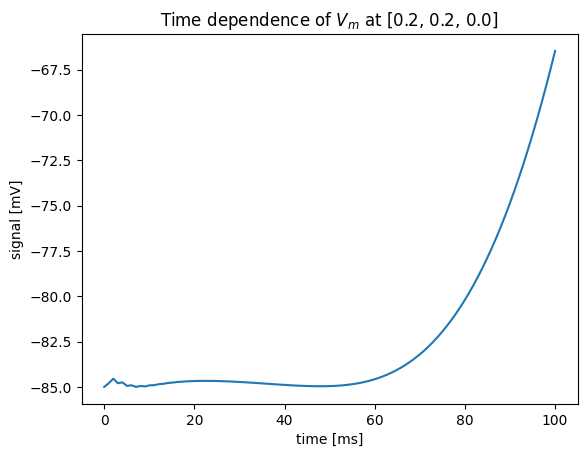

In [5]:
model.plot_signal()

### Plotting a transmembrane potential solution of a cell model

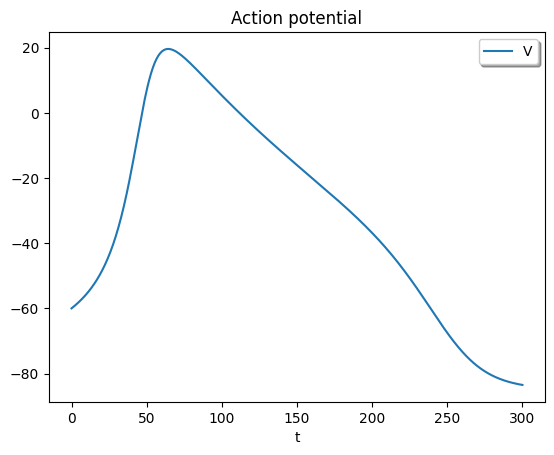

In [6]:
cell_model.visualize(300, -60, 0)

In [7]:
plot_vector_field(domain, lambda x: [x[0], x[0], 0])

Widget(value='<iframe src="http://localhost:41121/index.html?ui=P_0x7f736c0bfad0_1&reconnect=auto" class="pyvi…